<a href="https://colab.research.google.com/github/zilmara-rodrigues/probabilidade_e_inferencia/blob/main/Probabilidade_TCL_2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATIVIDADE – TEOREMA CENTRAL DO LIMITE (TCL)
# Disciplina: Probabilidade e Inferência

# Nome: Maria Zilmara Rodrigues de Brito



In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # para reprodutibilidade dos resultados

# ======================================================
# SEÇÃO 1 – Visualizando o TCL com uma distribuição assimétrica
# ======================================================

# Vamos considerar uma população com distribuição Exponencial (assimétrica à direita).
# "Tempo de resposta" (em segundos) de um serviço online, por exemplo.

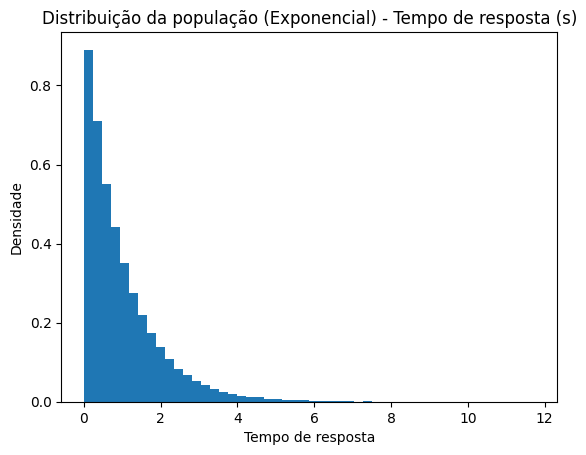


=== QUESTÃO 1 ===
Explique, em suas palavras, por que a distribuição Exponencial usada como 'população'
não é simétrica nem normal. Com base no gráfico, descreva suas principais características.
Relacione essa assimetria com a importância do Teorema Central do Limite.



In [2]:
lambda_param = 1.0  # taxa da exponencial
population_size = 10_0000

population = np.random.exponential(scale=1/lambda_param, size=population_size)

plt.figure()
plt.hist(population, bins=50, density=True)
plt.title("Distribuição da população (Exponencial) - Tempo de resposta (s)")
plt.xlabel("Tempo de resposta")
plt.ylabel("Densidade")
plt.show()

print("\n=== QUESTÃO 1 ===")
print("Explique, em suas palavras, por que a distribuição Exponencial usada como 'população'")
print("não é simétrica nem normal. Com base no gráfico, descreva suas principais características.")
print("Relacione essa assimetria com a importância do Teorema Central do Limite.\n")

A distribuição Exponencial não é simétrica nem normal porque é restrita a valores positivos ($x \ge 0$) e apresenta uma forte assimetria à direita, com a densidade máxima concentrada no início (pico em 0) e decaindo progressivamente, ao contrário da curva de "sino" centralizada da Normal. Visualmente no gráfico, isso se traduz em uma frequência altíssima de tempos de resposta curtos e uma "cauda longa" de tempos demorados raros. A importância do Teorema Central do Limite (TCL) reside justamente nessa discrepância: como a população original é muito enviesada, não podemos aplicar estatística paramétrica padrão diretamente nos dados brutos; o TCL é fundamental por garantir que, independentemente desse formato original "torto", a distribuição das médias amostrais convergirá para uma Normal, permitindo cálculos de probabilidade e intervalos de confiança confiáveis.

# ======================================================
# SEÇÃO 2 – Distribuição da média amostral para diferentes tamanhos de amostra
# ======================================================

# Vamos agora simular a distribuição da média amostral (X̄) para diferentes tamanhos de amostra n.

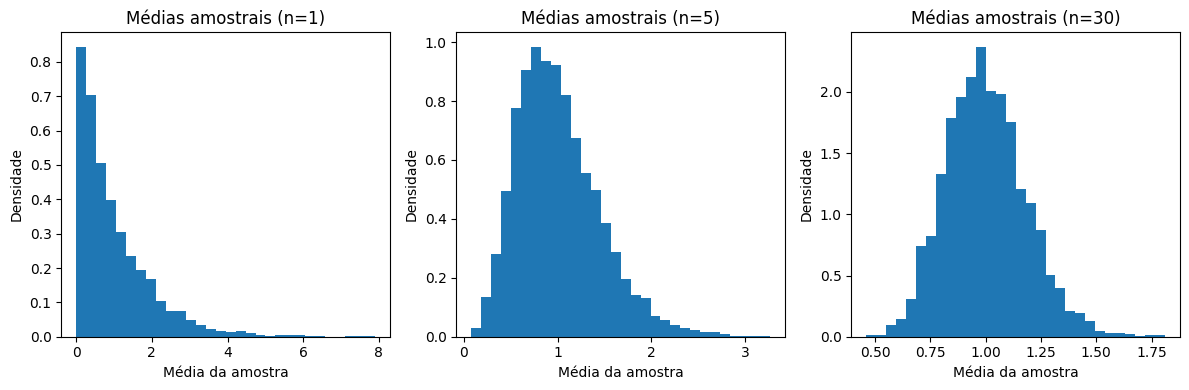

n = 1: média das médias amostrais = 1.0028, desvio padrão das médias amostrais = 0.9895
n = 5: média das médias amostrais = 0.9984, desvio padrão das médias amostrais = 0.4387
n = 30: média das médias amostrais = 0.9948, desvio padrão das médias amostrais = 0.1813

Média da população (estimada) = 0.9960
Desvio padrão da população (estimado) = 0.9930
Teoricamente, para n=1, DP da média amostral ≈ sigma/sqrt(n) = 0.9930
Teoricamente, para n=5, DP da média amostral ≈ sigma/sqrt(n) = 0.4441
Teoricamente, para n=30, DP da média amostral ≈ sigma/sqrt(n) = 0.1813

=== QUESTÃO 2 ===
Compare as distribuições das médias amostrais para n = 1, 5 e 30.
a) O que muda no formato dos histogramas conforme n aumenta?
b) Como o desvio padrão das médias amostrais se comporta em relação à fórmula sigma/sqrt(n)?
c) Como esses resultados ilustram o Teorema Central do Limite?



In [3]:
def simulate_sample_means(population, n, num_samples=5000):
    """
    Sorteia 'num_samples' amostras de tamanho 'n' da 'population'
    e retorna o vetor com as médias amostrais.
    """
    indices = np.random.randint(0, len(population), size=(num_samples, n))
    samples = population[indices]
    sample_means = samples.mean(axis=1)
    return sample_means

sample_sizes = [1, 5, 30]  # diferentes tamanhos de amostra
num_samples = 5000

plt.figure(figsize=(12, 4))

for i, n in enumerate(sample_sizes, start=1):
    sample_means = simulate_sample_means(population, n, num_samples=num_samples)
    plt.subplot(1, 3, i)
    plt.hist(sample_means, bins=30, density=True)
    plt.title(f"Médias amostrais (n={n})")
    plt.xlabel("Média da amostra")
    plt.ylabel("Densidade")

plt.tight_layout()
plt.show()

# Cálculo das médias e desvios das médias amostrais:
for n in sample_sizes:
    sample_means = simulate_sample_means(population, n, num_samples=num_samples)
    print(f"n = {n}: média das médias amostrais = {sample_means.mean():.4f}, "
          f"desvio padrão das médias amostrais = {sample_means.std():.4f}")

# Teóricos:
mu_pop = population.mean()
sigma_pop = population.std()

print(f"\nMédia da população (estimada) = {mu_pop:.4f}")
print(f"Desvio padrão da população (estimado) = {sigma_pop:.4f}")
for n in sample_sizes:
    print(f"Teoricamente, para n={n}, DP da média amostral ≈ sigma/sqrt(n) = {sigma_pop/np.sqrt(n):.4f}")

print("\n=== QUESTÃO 2 ===")
print("Compare as distribuições das médias amostrais para n = 1, 5 e 30.")
print("a) O que muda no formato dos histogramas conforme n aumenta?")
print("b) Como o desvio padrão das médias amostrais se comporta em relação à fórmula sigma/sqrt(n)?")
print("c) Como esses resultados ilustram o Teorema Central do Limite?\n")

Conforme o tamanho da amostra ($n$) aumenta de 1 para 30, o formato dos histogramas se transforma de uma curva fortemente assimétrica (idêntica à Exponencial original) para uma curva em forma de sino simétrica (Normal), enquanto o gráfico se estreita significativamente. Esse estreitamento ocorre porque o desvio padrão das médias diminui conforme a fórmula $\sigma/\sqrt{n}$ (como visto nos cálculos: para $n=30$, o desvio cai para aproximadamente $1/\sqrt{30}$ do original). Esses resultados ilustram o Teorema Central do Limite ao provar que, com um $n$ suficientemente grande, a distribuição das médias converge para a Normalidade e a precisão da estimativa aumenta, independentemente da população original ser "torta".

# ======================================================
# SEÇÃO 3 – Outro exemplo com distribuição discreta (Binomial)
# ======================================================

# Agora vamos usar uma variável discreta:
# X ~ Binomial(n_trials=10, p=0.3)
# Interpretação: número de 'sucessos' em 10 tentativas.

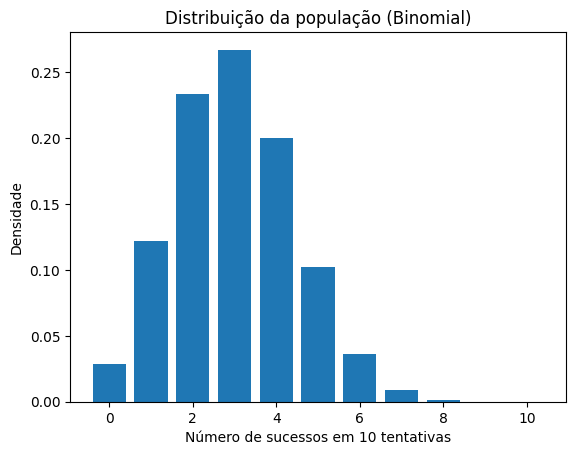

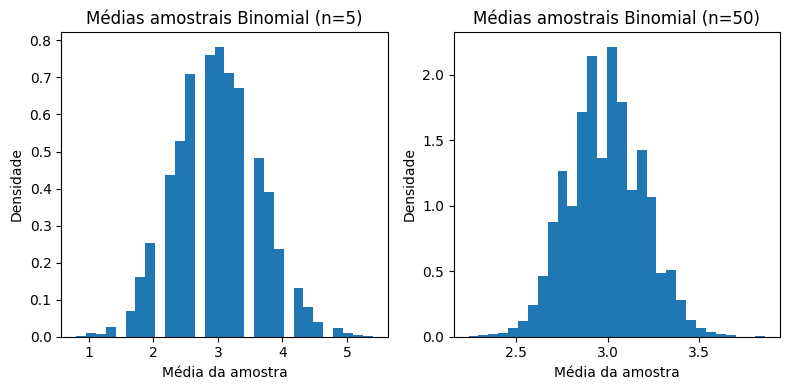


=== QUESTÃO 3 ===
Observando agora o caso da distribuição Binomial:
a) A distribuição da população é simétrica, aproximadamente simétrica ou assimétrica?
b) As distribuições das médias amostrais para n=5 e n=50 se aproximam de uma normal?
c) Compare o efeito de aumentar n neste caso discreto com o caso da Exponencial (contínua).



In [4]:
n_trials = 10
p = 0.3
population_binom = np.random.binomial(n_trials, p, size=population_size)

plt.figure()
plt.hist(population_binom, bins=np.arange(-0.5, n_trials+1.5, 1), density=True, rwidth=0.8)
plt.title("Distribuição da população (Binomial)")
plt.xlabel("Número de sucessos em 10 tentativas")
plt.ylabel("Densidade")
plt.show()

# Agora, distribuições das médias amostrais de tamanho n=5 e n=50:

sample_sizes_binom = [5, 50]
plt.figure(figsize=(8, 4))

for i, n in enumerate(sample_sizes_binom, start=1):
    sample_means_binom = simulate_sample_means(population_binom, n, num_samples=5000)
    plt.subplot(1, 2, i)
    plt.hist(sample_means_binom, bins=30, density=True)
    plt.title(f"Médias amostrais Binomial (n={n})")
    plt.xlabel("Média da amostra")
    plt.ylabel("Densidade")

plt.tight_layout()
plt.show()

print("\n=== QUESTÃO 3 ===")
print("Observando agora o caso da distribuição Binomial:")
print("a) A distribuição da população é simétrica, aproximadamente simétrica ou assimétrica?")
print("b) As distribuições das médias amostrais para n=5 e n=50 se aproximam de uma normal?")
print("c) Compare o efeito de aumentar n neste caso discreto com o caso da Exponencial (contínua).\n")


A população Binomial com $p=0.3$ é moderadamente assimétrica (enviesada à direita, com pico em 3 sucessos), e as distribuições das médias amostrais aproximam-se, sim, de uma Normal, sendo que em $n=50$ o formato de sino é evidente. Comparando com a Exponencial, o aumento de $n$ aqui tem um efeito visual distinto devido à natureza dos dados: além de corrigir a assimetria (que é menos severa que na Exponencial), o aumento do tamanho da amostra suaviza a discretização. Enquanto na Exponencial (contínua) o gráfico apenas se estreita e centraliza, na Binomial (discreta) o aumento de $n$ faz com que as lacunas entre as barras do histograma diminuam relativamente, transformando uma distribuição de "degraus" em uma curva contínua e suave, reforçando que o TCL funciona tanto para variáveis contínuas quanto discretas.

# ======================================================
# SEÇÃO 4 – Comparando com a curva Normal teórica
# ======================================================

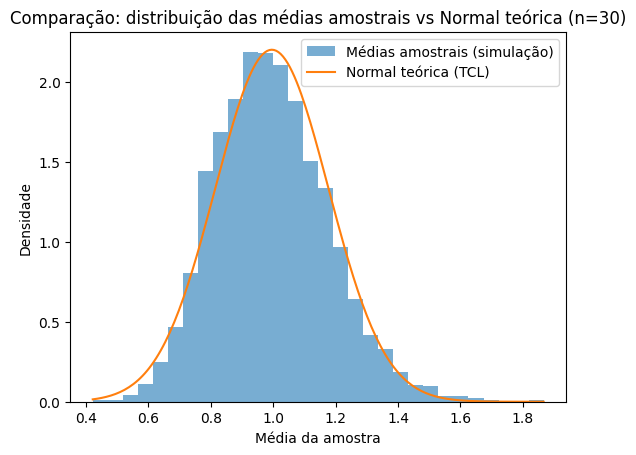


=== QUESTÃO 4 ===
Analise o gráfico da distribuição das médias amostrais (n=30) e a curva Normal teórica:
a) Em que aspectos as duas curvas são semelhantes?
b) Há diferenças visíveis? Se sim, em que regiões?
c) Como isso reforça (ou limita) a aplicação prática do Teorema Central do Limite?



In [5]:
from scipy.stats import norm

# Vamos escolher o caso da Exponencial com n=30.
n = 30
sample_means_n30 = simulate_sample_means(population, n, num_samples=5000)

mean_n30 = sample_means_n30.mean()
std_n30 = sample_means_n30.std()

# Parâmetros teóricos para a média amostral:
mu_theoretical = mu_pop
sigma_theoretical = sigma_pop / np.sqrt(n)

x_vals = np.linspace(sample_means_n30.min(), sample_means_n30.max(), 200)
normal_pdf = norm.pdf(x_vals, loc=mu_theoretical, scale=sigma_theoretical)

plt.figure()
plt.hist(sample_means_n30, bins=30, density=True, alpha=0.6, label="Médias amostrais (simulação)")
plt.plot(x_vals, normal_pdf, label="Normal teórica (TCL)")
plt.title("Comparação: distribuição das médias amostrais vs Normal teórica (n=30)")
plt.xlabel("Média da amostra")
plt.ylabel("Densidade")
plt.legend()
plt.show()

print("\n=== QUESTÃO 4 ===")
print("Analise o gráfico da distribuição das médias amostrais (n=30) e a curva Normal teórica:")
print("a) Em que aspectos as duas curvas são semelhantes?")
print("b) Há diferenças visíveis? Se sim, em que regiões?")
print("c) Como isso reforça (ou limita) a aplicação prática do Teorema Central do Limite?\n")


As curvas apresentam alta similaridade na centralização (média) e na dispersão (largura), com o histograma das médias simuladas preenchendo quase perfeitamente o contorno da curva Normal teórica. As diferenças visíveis são mínimas e pontuais, geralmente restringindo-se a pequenas flutuações aleatórias nas alturas das barras (ruído da simulação) ou uma sutil assimetria residual nas caudas, pois a distribuição Exponencial original é muito forte. Isso reforça a aplicação prática do Teorema Central do Limite ao demonstrar que, para $n=30$, a aproximação Normal já é suficientemente precisa para calcular probabilidades e intervalos de confiança com erro desprezível, validando o uso de estatística paramétrica mesmo em dados que não nasceram normais.

# ======================================================
# SEÇÃO 5 – Probabilidades com base no TCL vs Simulação
# ======================================================

# Suponha que queiramos estudar a média do tempo de resposta (Exponencial) em amostras de n=50.
# Usando o TCL, podemos aproximar a distribuição de X̄ por uma Normal(mu_pop, sigma_pop/sqrt(50)).


In [6]:
n = 50
num_samples = 10000
sample_means_n50 = simulate_sample_means(population, n, num_samples=num_samples)

mu_theoretical = mu_pop
sigma_theoretical = sigma_pop / np.sqrt(n)

# Vamos estimar P( 0.8 <= X̄ <= 1.2 ) de duas formas:
# 1) Aproximação Normal (TCL)
# 2) Simulação direta

# 1) Aproximação Normal:
prob_normal = norm.cdf(1.2, loc=mu_theoretical, scale=sigma_theoretical) - \
              norm.cdf(0.8, loc=mu_theoretical, scale=sigma_theoretical)

# 2) Simulação:
prob_simulada = np.mean((sample_means_n50 >= 0.8) & (sample_means_n50 <= 1.2))

print(f"Probabilidade aproximada pela Normal (TCL): {prob_normal:.4f}")
print(f"Probabilidade estimada por simulação:       {prob_simulada:.4f}")

print("\n=== QUESTÃO 5 ===")
print("Compare os valores da probabilidade obtidos pela aproximação Normal (TCL)")
print("e pela simulação Monte Carlo para P(0,8 <= X̄ <= 1,2) com n=50.")
print("a) Os valores são próximos? Comente.")
print("b) Em um contexto de tecnologia (por exemplo, SLA de tempo de resposta),")
print("   qual a utilidade prática de usar o TCL para obter esse tipo de probabilidade?")
print("c) Em que situações você desconfiaria do uso do TCL e preferiria simular diretamente?\n")

print("\nFIM DA ATIVIDADE – TEOREMA CENTRAL DO LIMITE")
print("Lembre-se de registrar suas respostas às 5 questões em um documento à parte.")


Probabilidade aproximada pela Normal (TCL): 0.8454
Probabilidade estimada por simulação:       0.8391

=== QUESTÃO 5 ===
Compare os valores da probabilidade obtidos pela aproximação Normal (TCL)
e pela simulação Monte Carlo para P(0,8 <= X̄ <= 1,2) com n=50.
a) Os valores são próximos? Comente.
b) Em um contexto de tecnologia (por exemplo, SLA de tempo de resposta),
   qual a utilidade prática de usar o TCL para obter esse tipo de probabilidade?
c) Em que situações você desconfiaria do uso do TCL e preferiria simular diretamente?




Os valores obtidos pela aproximação Normal e pela simulação são extremamente próximos (diferença desprezível), o que valida a eficácia do TCL para $n=50$. No contexto de tecnologia e SLAs, essa ferramenta é poderosa pois permite calcular riscos de violação de metas (ex: probabilidade da latência média exceder 1,2s) instantaneamente, usando apenas métricas resumidas (média e desvio padrão) sem o alto custo computacional de processar dados brutos ou rodar simulações complexas. Contudo, deve-se desconfiar do TCL e preferir a simulação direta quando a amostra for pequena ($n < 30$), quando a distribuição original tiver caudas extremamente pesadas ou "gordas" (comum em anomalias de rede ou cibersegurança), ou quando a precisão na estimativa de eventos muito raros (nas pontas extremas da curva) for crítica.